# Distribucion de los Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

sns.set_theme('paper')

In [36]:
state_abreviations = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI", "ID", 
    "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", 
    "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", 
    "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", 
    "WI", "WY"
]

state_dictionary = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", 
    "CA": "California", "CO": "Colorado", "CT": "Connecticut", "DC":"District of Columbia","DE": "Delaware", 
    "FL": "Florida", "GA": "Georgia", "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", 
    "IN": "Indiana", "IA": "Iowa", "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", 
    "ME": "Maine", "MD": "Maryland", "MA": "Massachusetts", "MI": "Michigan", 
    "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri", "MT": "Montana", 
    "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey", 
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", 
    "OH": "Ohio", "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", 
    "RI": "Rhode Island", "SC": "South Carolina", "SD": "South Dakota", "TN": "Tennessee", 
    "TX": "Texas", "UT": "Utah", "VT": "Vermont", "VA": "Virginia", "WA": "Washington", 
    "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming"
}

state_dictionary_inv = dict(zip(state_dictionary.values(), state_dictionary.keys()))

In [51]:
def showPie(columna, excluir=["SD"], max=15):
  for substring in excluir:
    columna = columna[~columna.astype(str).str.contains(substring)]
  
  count_values = pd.Series(columna).value_counts()
  count_2 = count_values.copy()
  
  if max > count_values.shape[0]:
    max = count_values.shape[0]
  
  if len(count_values) > max:
      count_values = count_2.iloc[:max]
      count_values['Otros'] = count_2.iloc[max:].sum()
      
  if 'Otros' not in count_values.index:
    count_values['Otros'] = 0
  
  datos = pd.DataFrame({"valor":count_values.index, "ocurrencia": count_values.values})

  plt.title(columna.name)
  plt.pie(datos["ocurrencia"], labels=datos['valor'], autopct='%1.1f%%')
  plt.show()
 
def concatenar(data_1, data_2,  axis=1):
  return pd.concat([data_1, data_2], axis=axis)

def contar_nulos(data):
  return data.isna().sum()

def mapear(columna: pd.Series, mapa={'NO': 0, 'SI':1}):
  return columna.map(mapa)

def showPiePx(columna, max=15, pref="", title=""):
  count_values = pd.Series(columna).value_counts()
  count_2 = count_values.copy()
  
  if max > count_values.shape[0]:
    max = count_values.shape[0]
  
  if len(count_values) > max:
      count_values = count_2.iloc[:max]
      count_values['Otros'] = count_2.iloc[max:].sum()
      
  if 'Otros' not in count_values.index:
    count_values['Otros'] = 0
  
  datos = pd.DataFrame({"valor":count_values.index, "ocurrencia": count_values.values})

     
  # Plot pie chart using Plotly Express
  fig = px.pie(datos, values='ocurrencia', names='valor', title=title)
  fig.update_traces(textposition='outside', textinfo='percent+label')
  fig.show()

def nulos_filas(data):
    return pd.DataFrame(data.isna().sum(axis=1).value_counts().reset_index().values, columns=['cant_col_nulas', 'cantidad'])

def resumen(data, nombre_tabla="Resumen Tabla"):
    filas, columnas = data.shape
    valores = filas * columnas
    nulos, duplicados =  data.isna().values.sum(), data.duplicated().sum()
    tasa_nulos, tasa_duplicados = nulos / valores, duplicados / valores

    salida = f'''<table>
    <thead>
    <tr><th colspan=3 style='text-align: center'>{nombre_tabla}</th></tr>
    </thead>
    <tbody>
    <tr><th> Detalle </th><th> Cantidad </th><th>Tasa</th></tr>
    <tr><td> Filas </td><td style='text-align: right'> {filas} </td><td style='text-align: center'>---</td><tr/>
    <tr><td> Columnas </td><td style='text-align: right'> {columnas} </td><td style='text-align: center'>---</td><tr/>
    <tr><td> Valores </td><td style='text-align: right'> {valores} </td><td style='text-align: center'>---</td<tr/>
    <tr><td> Nulos </td><td style='text-align: right'> {nulos} </td><td style='text-align: right'> {round(100*tasa_nulos, 2)} % </td><tr/>
    <tr><td> Duplicados </td><td style='text-align: right'> {duplicados} </td><td style='text-align: right'> {round(100*tasa_duplicados, 2)} %</td><tr/>
    </tbody>
    </table>'''

    display(Markdown(salida))

def ver_nulos_x_fila(data):
  ax = sns.barplot(x=nulos_filas(data).cant_col_nulas, y=nulos_filas(data).cantidad)
  for i in ax.containers:
      ax.bar_label(i,)
  plt.title("cantidad nulos x fila")
  plt.show()

def ver_nulos_x_columna(data):
  nulos_columnas = data.isna().sum()[data.isna().sum() > 0].sort_values(ascending=False)
  # ax = sns.barplot(x=nulos_columnas.index, y=nulos_columnas.values)
  if len(nulos_columnas) > 0:
    ax = sns.barplot(x=nulos_columnas.index, y=nulos_columnas.values)
    for i in ax.containers:
      ax.bar_label(i,)

In [3]:
df_maps_restaurantes = pd.read_parquet(r'Generated\Google\metada_sitios.parquet')

In [4]:
def get_state_ab(st):
    try:
        state = st.split(', ')[-1].split(' ')[0]
        if state in state_abreviations:
            return state
        else:
            return np.nan
    except:
        return np.nan
    
df_maps_restaurantes['state_ab'] = df_maps_restaurantes['address'].apply(get_state_ab)

In [5]:
top_5 = df_maps_restaurantes['state_ab'].value_counts().head(5).index.to_list()

In [6]:
df_maps_restaurantes = df_maps_restaurantes[df_maps_restaurantes['state_ab'].isin(top_5)]

In [7]:
df_maps_restaurantes.reset_index(inplace=True)

In [8]:
df_maps_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81394 entries, 0 to 81393
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             81394 non-null  int64  
 1   name              81394 non-null  object 
 2   address           81394 non-null  object 
 3   gmap_id           81394 non-null  object 
 4   description       25569 non-null  object 
 5   latitude          81394 non-null  float64
 6   longitude         81394 non-null  float64
 7   category          81394 non-null  object 
 8   avg_rating        81394 non-null  float64
 9   num_of_reviews    81394 non-null  int64  
 10  price             36360 non-null  object 
 11  hours             72996 non-null  object 
 12  MISC              80921 non-null  object 
 13  state             73245 non-null  object 
 14  relative_results  64236 non-null  object 
 15  url               81394 non-null  object 
 16  state_ab          81394 non-null  object

In [9]:
conteo_restaurantes = df_maps_restaurantes.name.value_counts()

C:\Users\javier\AppData\Local\Temp\ipykernel_10672\1069355176.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')


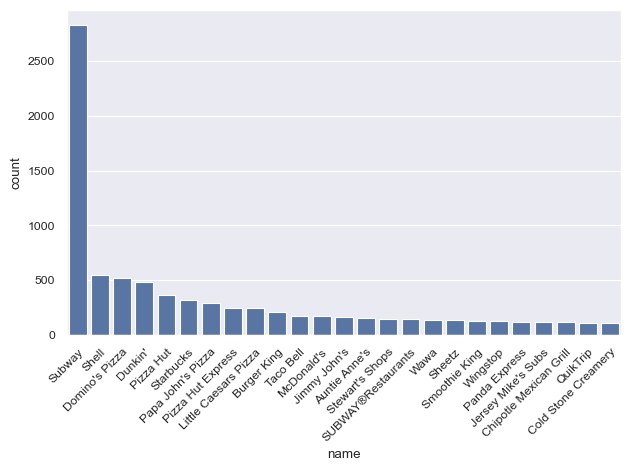

In [10]:
ax = sns.barplot(conteo_restaurantes.head(25))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha="right",rotation_mode='anchor')
plt.tight_layout()
plt.show()

In [11]:
df_maps_restaurantes.address.apply(lambda s: s.split(",")[0]).value_counts()

address
Subway              2824
Shell                552
Domino's Pizza       520
Dunkin'              487
Pizza Hut            368
                    ... 
Coffee Fever           1
Sergeant York          1
Bob's Happy Hour       1
Ma Dukes               1
Steak 48               1
Name: count, Length: 62346, dtype: int64

In [12]:
df_maps_restaurantes.address.apply(lambda s: s.split(",")[1]).value_counts().tail(15)

address
6271 St Augustine Rd      1
96-27 Linden Blvd         1
1228 Seawall Blvd         1
2323 Alameda Ave          1
25-20 Beach Channel Dr    1
549                       1
116 N Washington Ave      1
230 Cypress Ave           1
2123 N Bellflower Blvd    1
347 Don Shula Dr          1
46577 Mission Blvd        1
2018 Crockett Rd          1
12444 U.S. Hwy 190        1
700 S Florida Ave         1
260 S Broad St            1
Name: count, dtype: int64

In [13]:
def split3(s):
    try:
        return s.split(",")[2]
    except:
        return np.nan
    return np.nan
    

In [14]:
df_maps_restaurantes.address.apply(split3).value_counts()

address
New York          3126
Houston           2398
Brooklyn          2300
Los Angeles       2165
Philadelphia      1559
                  ... 
3111 S 31st St       1
2640 NY-3            1
FL 33544             1
Sorrento Ave         1
4825 SW 8th St       1
Name: count, Length: 7317, dtype: int64

In [15]:
df_maps_restaurantes.address.apply(lambda s: len(s.split(","))).value_counts()

address
4    77703
5     2387
3     1031
6      235
7       31
8        6
9        1
Name: count, dtype: int64

In [16]:
def split4(s):
    try:
        return s.split(",")[3]
    except:
        return np.nan
    return np.nan
    


In [17]:
df_maps_restaurantes.address.apply(split4).value_counts()

address
NY 10003           240
NY 10002           211
FL 33139           194
NY 10013           155
NY 11211           153
                  ... 
PA 15014             1
728 Highway 28       1
Honeoye              1
North Tonawanda      1
PA 15715             1
Name: count, Length: 7161, dtype: int64

In [18]:
def split5(s,):
    try:
        return s.split(",")[4]
    except:
        return np.nan
    return np.nan
    


In [19]:
df_maps_restaurantes.address.apply(split5).value_counts()

address
Los Angeles           14
TX 75261              12
NY 10019              10
TX 77002              10
TX 77032               9
                      ..
Orangevale             1
TX 78264               1
CA 94513               1
Palm Beach Gardens     1
CA 95050               1
Name: count, Length: 1748, dtype: int64

In [20]:
df_maps_restaurantes.gmap_id.value_counts()

gmap_id
0x80c2c778e3b73d33:0xbdc58662a4a97d49    2
0x864e87618a2d03c9:0xe54361fac6dd06d7    2
0x89c260220dcc103d:0xf4bf41e03f3cb67e    2
0x8640c08b5da38fed:0x387239b688b4e058    2
0x8644d38444e3adc3:0x728c8bb7e92b7f3     2
                                        ..
0x80c2bc823a059619:0xb40f9cef68f0d789    1
0x80c2bc81932f0b33:0x54b357a64282bc71    1
0x88d905a743c48b7d:0x2e0647351506d75d    1
0x89c6a3de9bec8d71:0xb402257b009bc3a0    1
0x89c6c74f43a49b55:0x6be6995921c58b12    1
Name: count, Length: 80973, dtype: int64

In [91]:
descripciones = df_maps_restaurantes.description.dropna()
descripciones.drop_duplicates(inplace=True)
descripciones_text = " ".join(descripciones.tolist()).lower()

In [92]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True, background_color='white').generate(descripciones_text)

In [25]:
cuenta_palabras = pd.DataFrame(data=[wordcloud.process_text(descripciones_text)]).T.rename({0:'count'}, axis=1).sort_values(by='count',ascending=False)

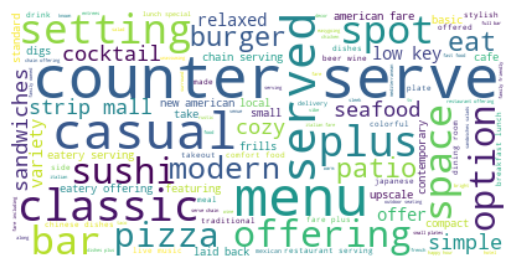

In [93]:
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [35]:
df_maps_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81394 entries, 0 to 81393
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             81394 non-null  int64  
 1   name              81394 non-null  object 
 2   address           81394 non-null  object 
 3   gmap_id           81394 non-null  object 
 4   description       25569 non-null  object 
 5   latitude          81394 non-null  float64
 6   longitude         81394 non-null  float64
 7   category          81394 non-null  object 
 8   avg_rating        81394 non-null  float64
 9   num_of_reviews    81394 non-null  int64  
 10  price             36360 non-null  object 
 11  hours             72996 non-null  object 
 12  MISC              80921 non-null  object 
 13  state             73245 non-null  object 
 14  relative_results  64236 non-null  object 
 15  url               81394 non-null  object 
 16  state_ab          81394 non-null  object

In [40]:
df_maps_restaurantes['state_name'] = df_maps_restaurantes['state_ab'].map(state_dictionary)

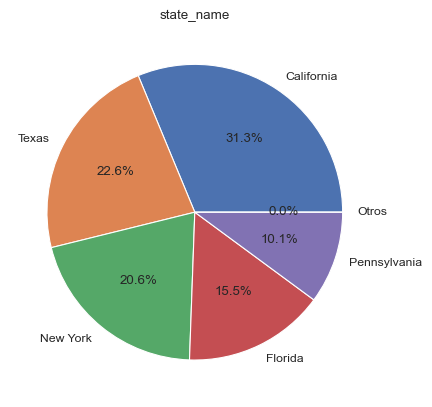

In [55]:
showPie(df_maps_restaurantes.state_name)

df_maps_restaurantes.query("state_ab == 'CA'")['latitude'].describe()

In [61]:
df_maps_restaurantes.query("state_ab == 'CA'")['latitude'].sort_values()

65882    28.491847
47662    32.542833
68994    32.543143
3182     32.543160
71593    32.543172
           ...    
37884    41.864680
66773    41.956804
47165    41.957300
66774    41.957550
69376    41.962382
Name: latitude, Length: 25436, dtype: float64

In [74]:



df_maps_restaurantes.drop(65882, inplace=True)

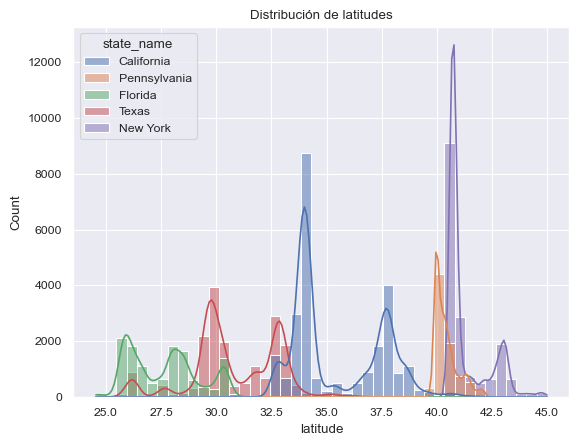

In [43]:

ax = sns.histplot(df_maps_restaurantes, x='latitude', hue='state_name', kde=True)


ax.set_title('Distribución de latitudes')

# Display the plot
plt.show()

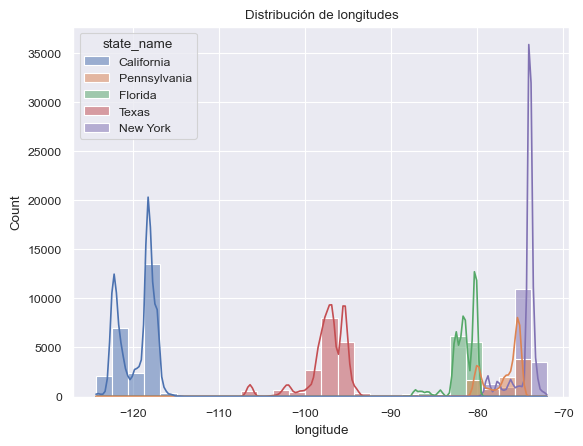

In [44]:
ax = sns.histplot(df_maps_restaurantes, x='longitude', hue='state_name', kde=True)


ax.set_title('Distribución de longitudes')

# Display the plot
plt.show()

In [33]:
ca_latitude_data.latitude.isna().sum()

0

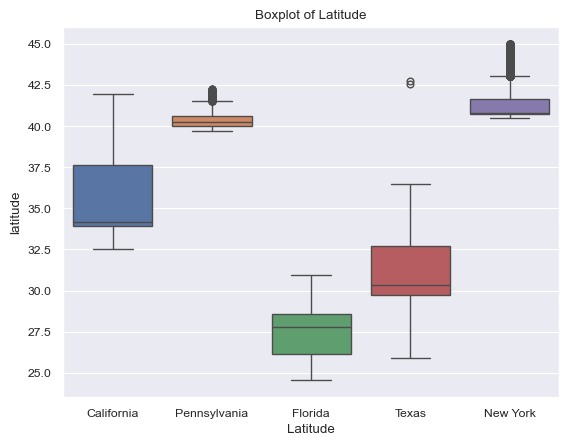

In [75]:
sns.boxplot(data=df_maps_restaurantes, x='state_name', y='latitude', hue="state_name" )
plt.title('Boxplot of Latitude')
plt.xlabel('Latitude')
plt.show()

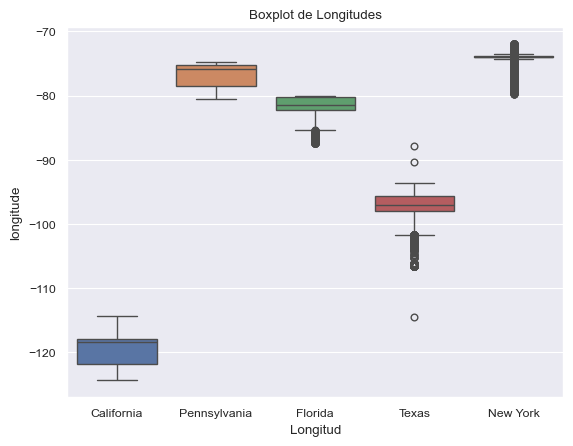

In [76]:
sns.boxplot(data=df_maps_restaurantes, x='state_name', y='longitude', hue="state_name" )
plt.title('Boxplot de Longitudes')
plt.xlabel('Longitud')
plt.show()

In [79]:
df_maps_restaurantes.category.explode().value_counts()

category
Restaurant                  35267
Fast food restaurant         9189
Pizza restaurant             8278
Takeout Restaurant           8065
Mexican restaurant           7751
                            ...  
Dry ice supplier                1
Professional organizer          1
Pressure washing service        1
Carpet cleaning service         1
Brazilian pastelaria            1
Name: count, Length: 1310, dtype: int64

In [94]:
categorias = df_maps_restaurantes.category.dropna()
categorias.drop_duplicates(inplace=True)
categorias = " ".join(categorias.tolist()).lower()

TypeError: sequence item 0: expected str instance, numpy.ndarray found

In [90]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True, background_color='white').generate(categorias)


TypeError: sequence item 0: expected str instance, numpy.ndarray found